In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.manifold import SpectralEmbedding
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [73]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

X = X.reshape((X.shape[0], -1))
X = X.astype(np.float64) / 255.0

subset = 30000
X_subset = X[:subset]
y_subset = y[:subset]

In [74]:
embedding = SpectralEmbedding(
    n_components=100, n_neighbors=5, random_state=42
)
X_embedded = embedding.fit_transform(X_subset)

X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(
    X_embedded, y_subset, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_emb, y_train_emb)
y_pred = knn.predict(X_test_emb)
accuracy = accuracy_score(y_test_emb, y_pred)
print("Accuracy of Spectral Embedding + KNN:", accuracy)

Accuracy of Spectral Embedding + KNN: 0.9661666666666666


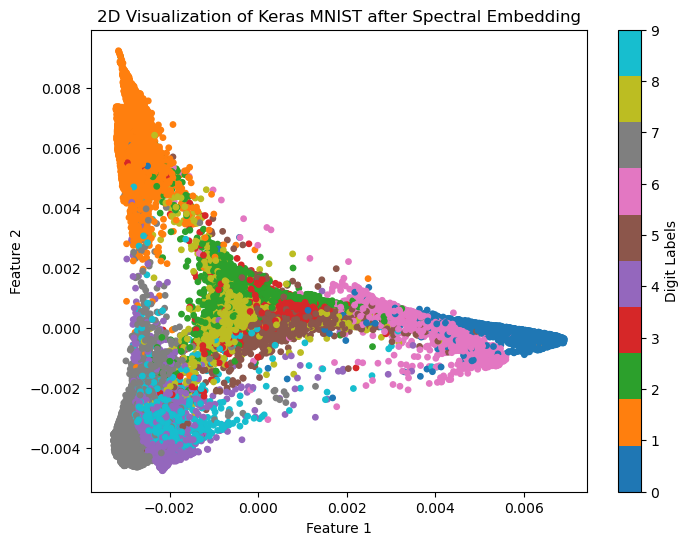

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_subset, cmap="tab10", s=15)
plt.title("2D Visualization of Keras MNIST after Spectral Embedding")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Digit Labels")
plt.show()